200
('Food Producers', 1)
('Support Services', 8)


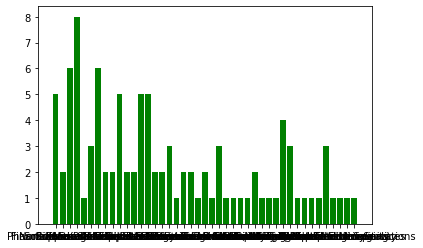

In [62]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt

#Task 1

url='https://en.wikipedia.org/wiki/FTSE_100_Index'
r=requests.get(url)
print(response.status_code)
soup=BeautifulSoup(r.content,'html.parser')
table=soup.find('table',{'id':'constituents'}).find('tbody')

#print(table)

data={}

def create_data(table):
    table_tr=table.find_all('tr')
    for tr in table_tr:
        td=tr.findAll('td')
        #print(td)
        if len(td)==3:
            data[td[0].text]=[td[1].text,td[2].text.replace('\n','')]
    #print(data)       
    
create_data(table)

companies=[]
tickers=[]
industry=[]

for key in data:
    companies.append(key)
    tickers.append(data[key][0])
    industry.append(data[key][1])
    
#print(companies,tickers,industry)



#Task 3

freq_ind = {}

def CountFrequency(list): 
  
    # Creating an empty dictionary  
    
    for item in list: 
        if (item in freq_ind): 
            freq_ind[item] += 1
        else: 
            freq_ind[item] = 1
  
    #for key, value in freq.items(): 
        #print ((key, value)) 

CountFrequency(industry)

print(min(freq_ind.items(), key=lambda x: x[1]))  # industry with minimal frequency

print(max(freq_ind.items(), key=lambda x: x[1]))  # industry with maximal frequency


plt.bar(list(freq_ind.keys()), freq_ind.values(), color='g')
plt.show()

